In [65]:
#Simulation of a single circle

import numpy as np
import matplotlib.pyplot as plt

import pickle
import gzip
from scipy.optimize import minimize



def gaussian_walk_on_circle(start, T, sigma):
    walk = np.zeros(T)
    walk[0] = start
    for i in range(1, T):
        increment = np.random.normal(0, sigma)  # Generate a Gaussian increment
        walk[i] = (walk[i - 1] + increment) % (2 * np.pi)  # Wrap around the circle
    return walk



def makehddata(N, T, h = 0.5, beta = 10, sigma = np.pi/2):

   # Perform Gaussian walk
    hd_sim=np.zeros(T)
    start = np.random.uniform(0, 2 * np.pi)
    hd_sim[0] = start
    for t in range(1, T):
        hd_sim[t] = hd_sim[t - 1] + np.random.normal(0, sigma/10)
        # Ensure the value stays within the range [0, 2*pi]
        hd_sim[t] = hd_sim[t] % (2 * np.pi)

    #Random "correct" direction for calculating response against
    rf_hd = np.random.uniform(0, 2 * np.pi, size=N)
    S = np.zeros((N, T))


    for i in range(N):
        for t in range(T):
            dist = np.abs(rf_hd[i] - hd_sim[t])
            if dist>np.pi:
                dist = 2*np.pi-dist
            response = np.log(h) + (np.log(beta/h))*np.exp(-dist**2 / (2*sigma))
            S[i, t] = np.random.poisson(lam=np.exp(response))
            
    return(hd_sim, S)



np.random.seed(42)
T = 3000
N = 10
h1 = 0.5
beta1 = 15
sigma = np.pi/2
hd_sim, S1 = makehddata(N, T, h1, beta1)

# Train-test split (80% train, 20% test)
split_index = int(T * 0.8)

# Training data
hd_sim_train = hd_sim[:split_index]
S_train = S1[:, :split_index]

# Test data
hd_sim_test = hd_sim[split_index:]
S_test = S1[:, split_index:]

print("Dimensions of hd_sim:", hd_sim.shape)
print("S1 shape: ", S1.shape)

print("Dimensions of hd_sim_train:", hd_sim_train.shape)
print("S_train shape: ", S_train.shape)
print("Dimensions of hd_sim_test:", hd_sim_test.shape)
print("S_test shape: ", S_test.shape)


data = {'hd_sim_train':hd_sim_train, 'hd_sim_test':hd_sim_test,'S_train':S_train, 'S_test':S_test}
with gzip.open('justonecircle.pkl.gz', 'wb') as f:
  pickle.dump(data, f)






Dimensions of hd_sim: (3000,)
S1 shape:  (10, 3000)
Dimensions of hd_sim_train: (2400,)
S_train shape:  (10, 2400)
Dimensions of hd_sim_test: (600,)
S_test shape:  (10, 600)


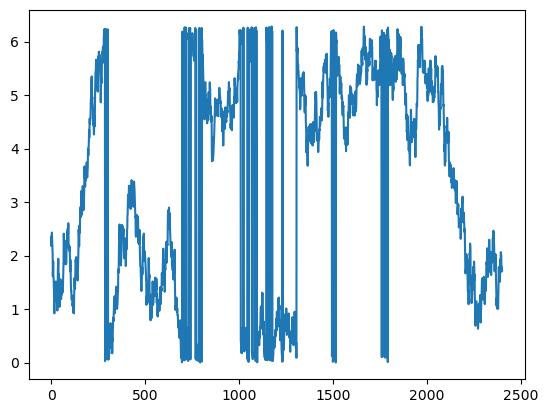

In [59]:
plt.figure()
plt.plot(hd_sim_train)

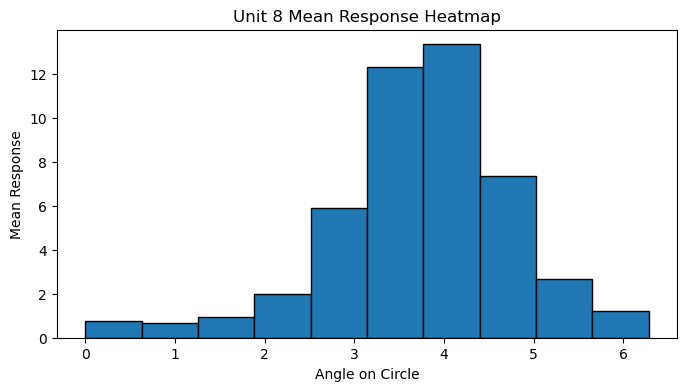

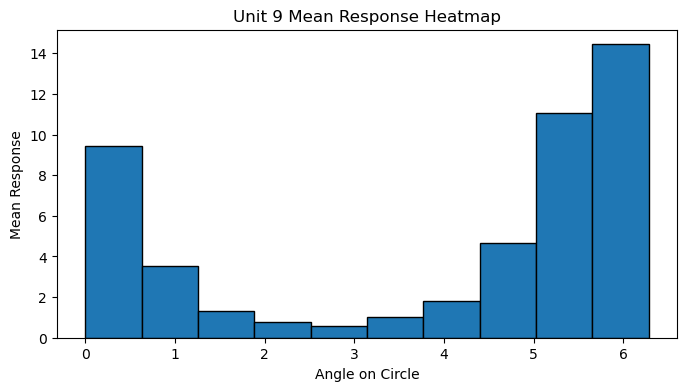

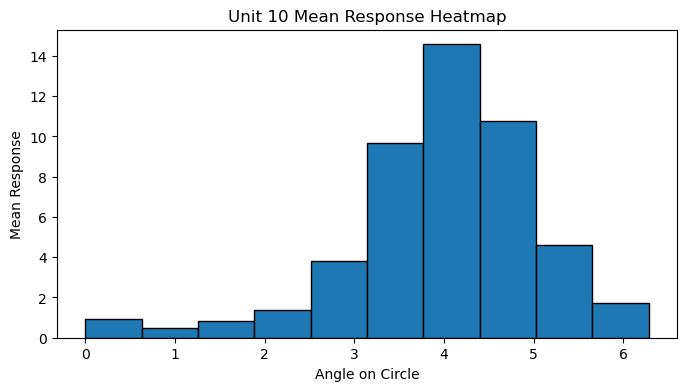

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmaps(S, hd_sim, units, title, nr_bins=10):
    angles = np.linspace(0, 2 * np.pi, nr_bins + 1)
    
    for i in units:
        angleverts1d = np.zeros(nr_bins)
        for j in range(nr_bins):
            inds = (hd_sim >= angles[j]) & (hd_sim < angles[j + 1])
            angleverts1d[j] = np.mean(S[i, inds])
        
        plt.figure(figsize=(8, 4))
        plt.title(f'Unit {i+1} {title}')
        plt.bar(angles[:-1], angleverts1d, width=angles[1] - angles[0], align='edge', edgecolor='black')
        plt.xlabel('Angle on Circle')
        plt.ylabel('Mean Response')
        plt.show()

# Example usage
N = 10  # Number of neurons
T = 3000  # Number of time steps
h1 = 0.5
beta1 = 10

np.random.seed(44)
hd_sim, S = makehddata(N, T, h1, beta1)

units = [7, 8, 9]  # Select the units (neurons) to plot
title = "Mean Response Heatmap"

plot_heatmaps(S_train, hd_sim_train, units, title)
